<a href="https://colab.research.google.com/github/Strong649/First-Repo/blob/main/covid_data_EDA%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
uploaded = files.upload()

Saving total_cases.csv to total_cases (1).csv


In [3]:
import io
file_name = list(uploaded.keys())[0]  # Get the name of the uploaded file
data = pd.read_csv(io.BytesIO(uploaded[file_name]))

In [4]:
data['date'] = pd.to_datetime(data['date'])

In [5]:
data.head()

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,2019-12-31,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-03,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-04,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
selected_countries = ['Belgium', 'Canada', 'United Kingdom', 'Pakistan', 'China',
                      'Slovenia', 'Vietnam', 'Bermuda', 'Mongolia', 'Egypt']

In [7]:
selected_data = data[['date'] + selected_countries]

In [8]:
selected_data.head()

,date,Belgium,Canada,United Kingdom,Pakistan,China,Slovenia,Vietnam,Bermuda,Mongolia,Egypt
0,2019-12-31,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN,NaN,NaN
3,2020-01-03,NaN,NaN,NaN,NaN,44,NaN,NaN,NaN,NaN,NaN
4,2020-01-04,NaN,NaN,NaN,NaN,44,NaN,NaN,NaN,NaN,NaN


In [9]:
# Check for missing values
print("Missing values per country:")
print(selected_data.isnull().sum())

Missing values per country:
date               0
Belgium           37
Canada            26
United Kingdom    32
Pakistan          63
China              0
Slovenia          66
Vietnam           28
Bermuda           80
Mongolia          76
Egypt             50
dtype: int64


In [10]:
# Fill missing values with 0
selected_data.fillna(0, inplace=True)

<ipython-input-10-4c86a50466d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.fillna(0, inplace=True)


In [11]:
print("Missing values per country:")
print(selected_data.isnull().sum())

Missing values per country:
date              0
Belgium           0
Canada            0
United Kingdom    0
Pakistan          0
China             0
Slovenia          0
Vietnam           0
Bermuda           0
Mongolia          0
Egypt             0
dtype: int64


In [12]:
print("\nSummary statistics:")
print(selected_data.describe())


Summary statistics:
                      date        Belgium         Canada  United Kingdom  \
count                  330     330.000000     330.000000    3.300000e+02   
mean   2020-06-12 12:00:00   94181.509091   91685.881818    3.044548e+05   
min    2019-12-31 00:00:00       0.000000       0.000000    0.000000e+00   
25%    2020-03-22 06:00:00    3977.500000    1334.000000    8.035500e+03   
50%    2020-06-12 12:00:00   60188.500000   97725.500000    2.687245e+05   
75%    2020-09-02 18:00:00   85902.500000  129798.500000    3.382990e+05   
max    2020-11-24 00:00:00  559515.000000  337555.000000    1.527495e+06   
std                    NaN  134711.330036   82419.359629    3.436245e+05   

            Pakistan         China      Slovenia      Vietnam     Bermuda  \
count     330.000000    330.000000    330.000000   330.000000  330.000000   
mean   151994.200000  75526.857576   6098.530303   504.536364  110.175758   
min         0.000000     27.000000      0.000000     0.000000  

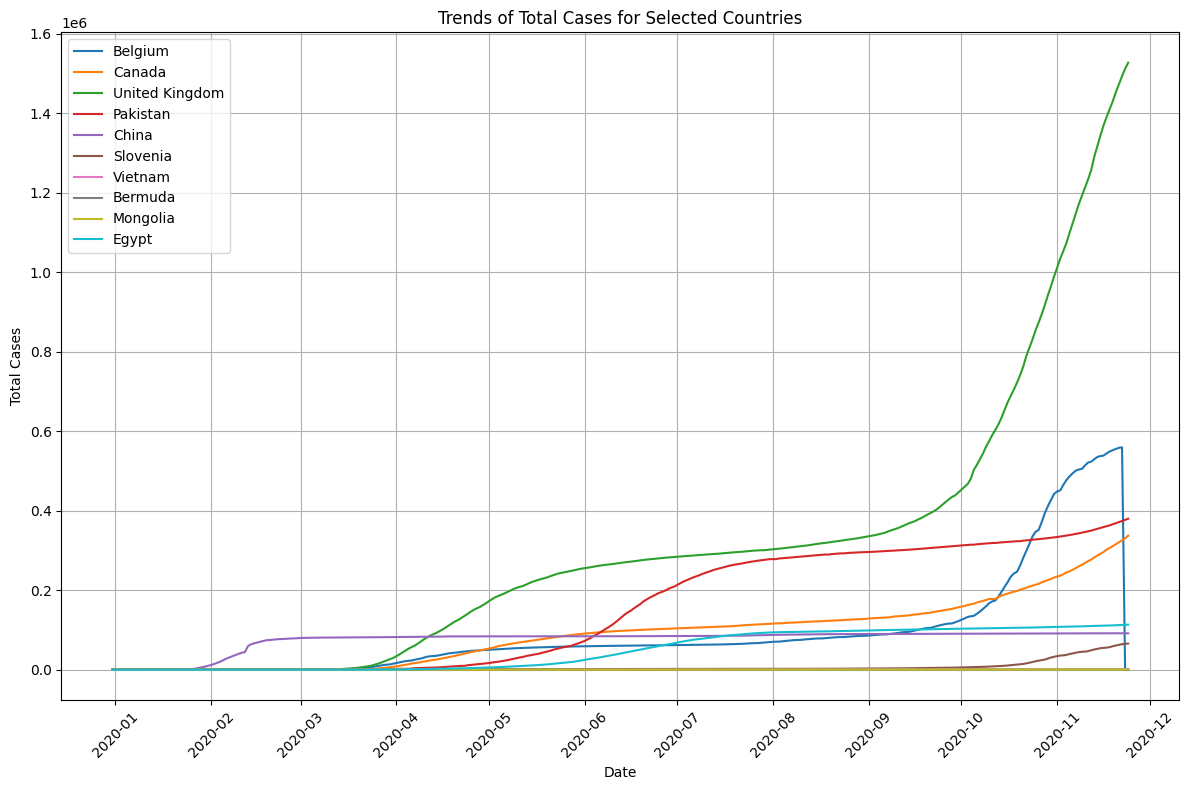

In [13]:
# Visualize the trends of total cases for the selected countries
plt.figure(figsize=(12, 8))
for country in selected_countries:
    plt.plot(selected_data['date'], selected_data[country], label=country)

plt.title('Trends of Total Cases for Selected Countries')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

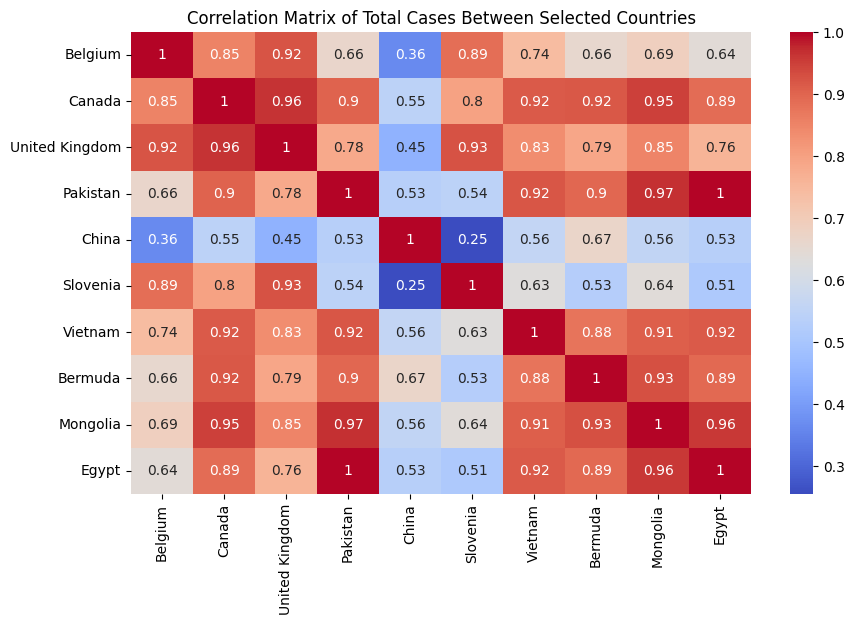

In [14]:
# Correlation Heatmap to explore relationships between countries
plt.figure(figsize=(10, 6))
sns.heatmap(selected_data[selected_countries].corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of Total Cases Between Selected Countries')
plt.show()